In [22]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Ver las primeras filas del conjunto de entrenamiento
print(train.head())

# Información básica del conjunto de entrenamiento
print(train.info())

# Estadísticas descriptivas
print(train.describe())

   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           7.0                Yes   
1   1      Jansport   Canvas   Small          10.0                Yes   
2   2  Under Armour  Leather   Small           2.0                Yes   
3   3          Nike    Nylon   Small           8.0                Yes   
4   4        Adidas   Canvas  Medium           1.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  
0         No       Tote  Black             11.611723  112.15875  
1        Yes  Messenger  Green             27.078537   68.88056  
2         No  Messenger    Red             16.643760   39.17320  
3         No  Messenger  Green             12.937220   80.60793  
4        Yes  Messenger  Green             17.749338   86.02312  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
--

In [24]:
# Verificar valores nulos
print(train.isnull().sum())

# Codificar variables categóricas (si las hay)
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Escalar características numéricas (opcional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop(columns=["Price"]))
test_scaled = scaler.transform(test)

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64


In [25]:
print(train.columns)

Index(['id', 'Compartments', 'Weight Capacity (kg)', 'Price', 'Brand_Jansport',
       'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour', 'Material_Leather',
       'Material_Nylon', 'Material_Polyester', 'Size_Medium', 'Size_Small',
       'Laptop Compartment_Yes', 'Waterproof_Yes', 'Style_Messenger',
       'Style_Tote', 'Color_Blue', 'Color_Gray', 'Color_Green', 'Color_Pink',
       'Color_Red'],
      dtype='object')


In [26]:
print(train.isnull().sum())

id                          0
Compartments                0
Weight Capacity (kg)      138
Price                       0
Brand_Jansport              0
Brand_Nike                  0
Brand_Puma                  0
Brand_Under Armour          0
Material_Leather            0
Material_Nylon              0
Material_Polyester          0
Size_Medium                 0
Size_Small                  0
Laptop Compartment_Yes      0
Waterproof_Yes              0
Style_Messenger             0
Style_Tote                  0
Color_Blue                  0
Color_Gray                  0
Color_Green                 0
Color_Pink                  0
Color_Red                   0
dtype: int64


In [27]:
print(train[["Weight Capacity (kg)", "Price"]].isnull().sum())

Weight Capacity (kg)    138
Price                     0
dtype: int64


In [28]:
# Imputar valores nulos en columnas numéricas (sin usar inplace=True en asignaciones encadenadas)
train["Weight Capacity (kg)"] = train["Weight Capacity (kg)"].fillna(train["Weight Capacity (kg)"].median())
train["Price"] = train["Price"].fillna(train["Price"].median())

# Alternativa usando fillna con un diccionario
# train.fillna({"Weight Capacity (kg)": train["Weight Capacity (kg)"].median(),
#               "Price": train["Price"].median()}, inplace=True)

In [29]:
# Resumen estadístico de las columnas numéricas
print(train.describe())

                  id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.000000         300000.000000  300000.000000
mean   149999.500000       5.443590             18.030012      81.411107
std     86602.684716       2.890766              6.965312      39.039340
min         0.000000       1.000000              5.000000      15.000000
25%     74999.750000       3.000000             12.099086      47.384620
50%    149999.500000       5.000000             18.068614      80.956120
75%    224999.250000       8.000000             24.001145     115.018160
max    299999.000000      10.000000             30.000000     150.000000


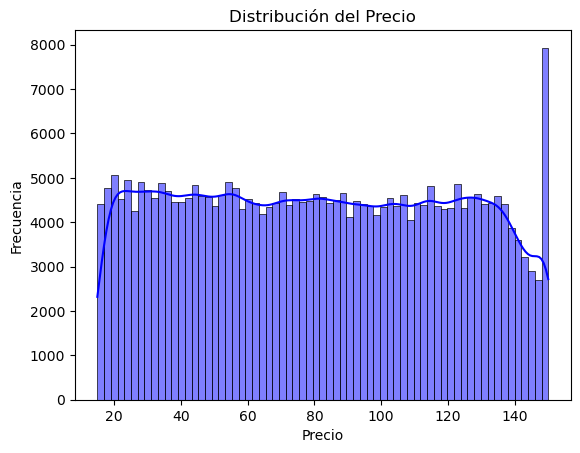

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la variable "Price"
sns.histplot(train["Price"], kde=True, color="blue")
plt.title("Distribución del Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

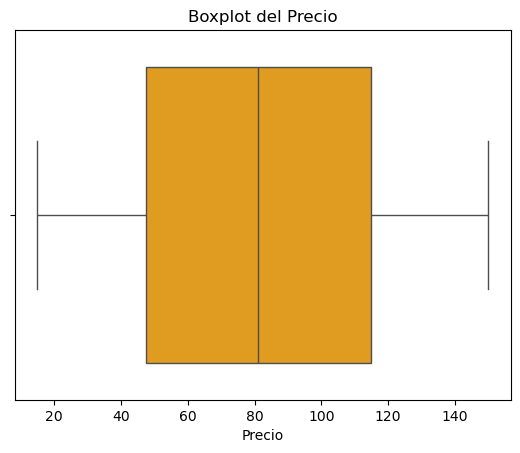

In [31]:
# Boxplot de la variable "Price"
sns.boxplot(x=train["Price"], color="orange")
plt.title("Boxplot del Precio")
plt.xlabel("Precio")
plt.show()

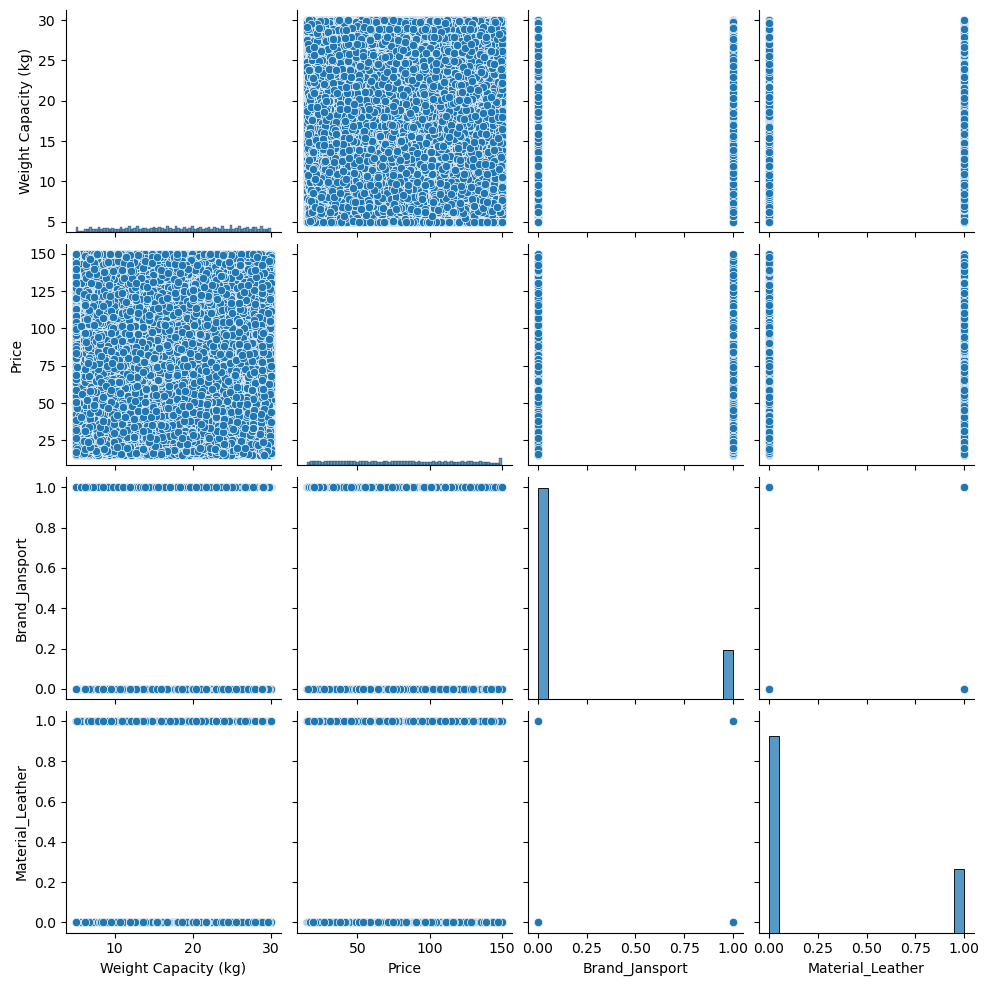

In [32]:
# Pairplot para algunas columnas numéricas
sns.pairplot(train[["Weight Capacity (kg)", "Price", "Brand_Jansport", "Material_Leather"]])
plt.show()

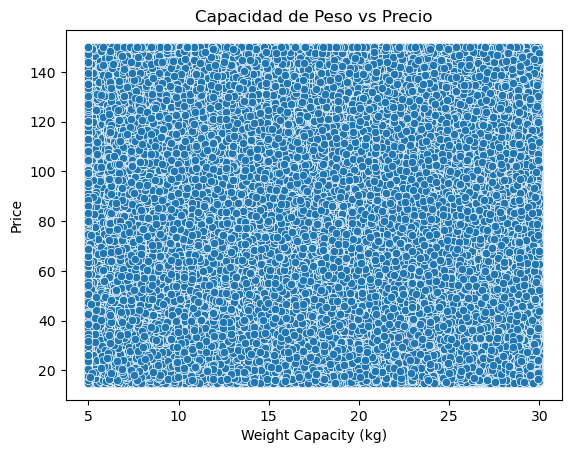

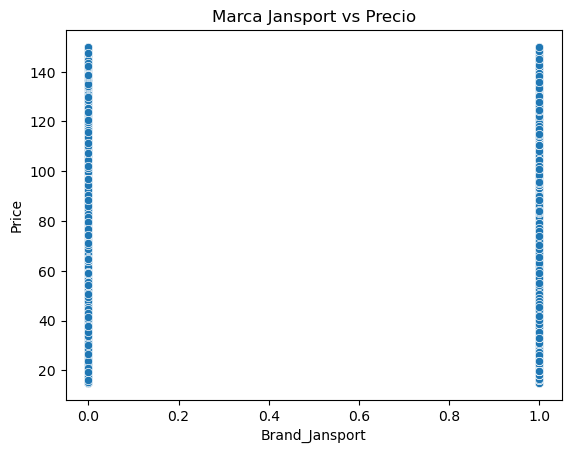

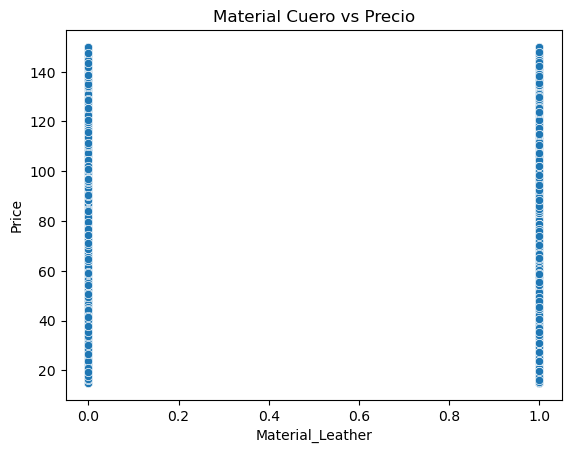

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión: Capacidad de Peso vs Precio
sns.scatterplot(x="Weight Capacity (kg)", y="Price", data=train)
plt.title("Capacidad de Peso vs Precio")
plt.show()

# Gráfico de dispersión: Marca Jansport vs Precio
sns.scatterplot(x="Brand_Jansport", y="Price", data=train)
plt.title("Marca Jansport vs Precio")
plt.show()

# Gráfico de dispersión: Material Cuero vs Precio
sns.scatterplot(x="Material_Leather", y="Price", data=train)
plt.title("Material Cuero vs Precio")
plt.show()

In [34]:
from scipy.stats import zscore

# Calcular Z-Scores para la columna "Price"
train["Price_ZScore"] = zscore(train["Price"])

# Identificar valores atípicos
outliers_zscore = train[(train["Price_ZScore"] > 3) | (train["Price_ZScore"] < -3)]
print("Valores atípicos (Z-Score):")
print(outliers_zscore)

Valores atípicos (Z-Score):
Empty DataFrame
Columns: [id, Compartments, Weight Capacity (kg), Price, Brand_Jansport, Brand_Nike, Brand_Puma, Brand_Under Armour, Material_Leather, Material_Nylon, Material_Polyester, Size_Medium, Size_Small, Laptop Compartment_Yes, Waterproof_Yes, Style_Messenger, Style_Tote, Color_Blue, Color_Gray, Color_Green, Color_Pink, Color_Red, Price_ZScore]
Index: []


In [35]:
# Calcular IQR para la columna "Price"
Q1 = train["Price"].quantile(0.25)
Q3 = train["Price"].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers_iqr = train[(train["Price"] < (Q1 - 1.5 * IQR)) | (train["Price"] > (Q3 + 1.5 * IQR))]
print("Valores atípicos (IQR):")
print(outliers_iqr)

Valores atípicos (IQR):
Empty DataFrame
Columns: [id, Compartments, Weight Capacity (kg), Price, Brand_Jansport, Brand_Nike, Brand_Puma, Brand_Under Armour, Material_Leather, Material_Nylon, Material_Polyester, Size_Medium, Size_Small, Laptop Compartment_Yes, Waterproof_Yes, Style_Messenger, Style_Tote, Color_Blue, Color_Gray, Color_Green, Color_Pink, Color_Red, Price_ZScore]
Index: []


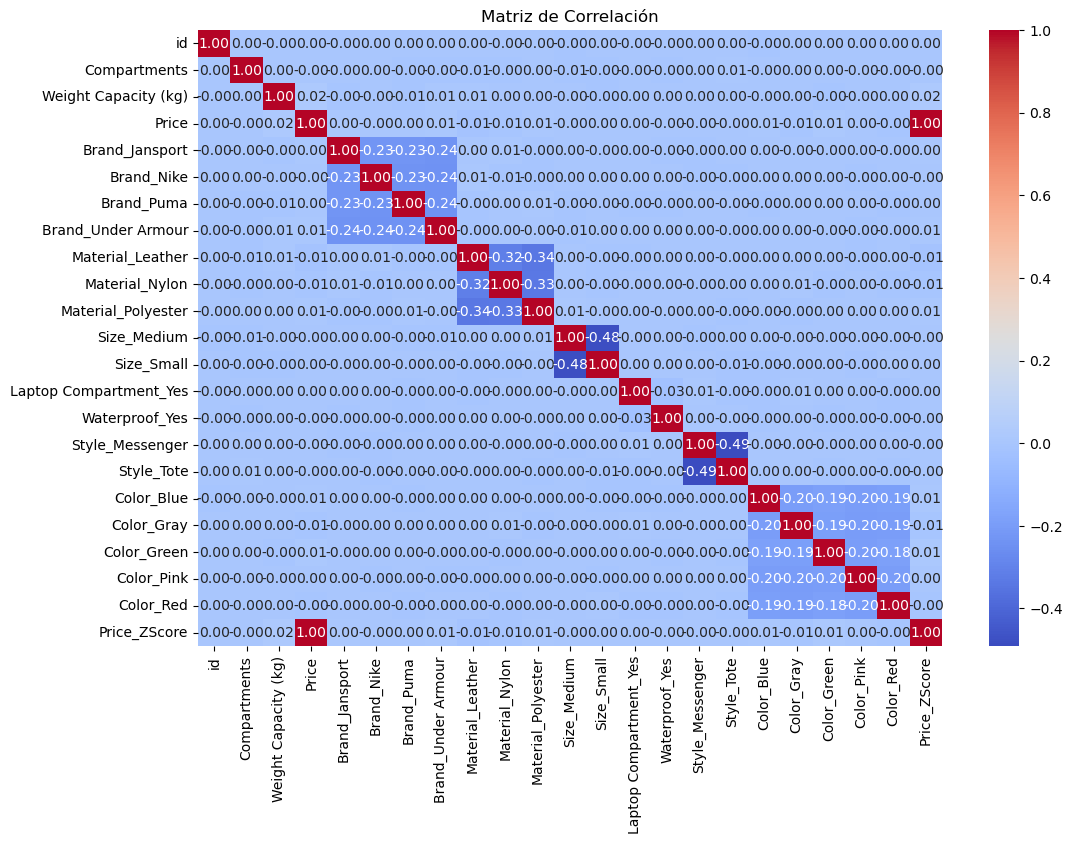

In [36]:
# Calcular la matriz de correlación
corr_matrix = train.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = train.drop(columns=["Price"])  # Todas las columnas excepto "Price"
y = train["Price"]  # Columna "Price" es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Usar un modelo más simple
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

# Escalar solo las características (no la variable objetivo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en datos de prueba: {rmse}")

RMSE en datos de prueba: 1.1478302151219435


/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar solo las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados de nuevo a DataFrames con nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Usar un modelo más simple
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en datos de prueba: {rmse}")

RMSE en datos de prueba: 1.1478254604548221


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir los parámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Aplicar Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE con el mejor modelo: {rmse}")

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Cargar los datos
data = pd.read_csv("train.csv")

# Definir X (características) y y (variable objetivo)
X = data.drop(columns=["Price"])  # Todas las columnas excepto "Price"
y = data["Price"]  # Columna "Price" es la variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))

# Columnas numéricas
X_train_numeric = X_train.select_dtypes(exclude=['object'])
X_test_numeric = X_test.select_dtypes(exclude=['object'])

# Combinar columnas numéricas y codificadas
X_train_combined = np.hstack((X_train_numeric, X_train_encoded))
X_test_combined = np.hstack((X_test_numeric, X_test_encoded))

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Usar un modelo más simple
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

# Validación cruzada en paralelo con 3 folds
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.036931690426016 (± 0.005403024569212007)


In [7]:
from sklearn.model_selection import train_test_split

# Tomar una muestra más pequeña del conjunto de entrenamiento
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)

# Validación cruzada en la muestra
scores = cross_val_score(model, X_train_sample, y_train_sample, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.13370427994281 (± 0.20827431152646228)


In [8]:
# Usar un modelo más simple
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.036931690426016 (± 0.005403024569212007)


In [9]:
# Validación cruzada con 3 folds
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.036931690426016 (± 0.005403024569212007)


In [10]:
# Validación cruzada en paralelo (usando todos los núcleos de la CPU)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.036931690426016 (± 0.005403024569212007)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Usar un modelo más simple
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

# Validación cruzada en paralelo con 3 folds
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-scores)
print(f"RMSE en validación cruzada: {rmse_scores.mean()} (± {rmse_scores.std()})")

RMSE en validación cruzada: 39.036931690426016 (± 0.005403024569212007)


In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Crear el modelo XGBoost
model_xgb = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Entrenar el modelo
model_xgb.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Calcular RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE con XGBoost: {rmse_xgb}")

# Validación cruzada con XGBoost
scores_xgb = cross_val_score(model_xgb, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_xgb = np.sqrt(-scores_xgb)
print(f"RMSE en validación cruzada (XGBoost): {rmse_scores_xgb.mean()} (± {rmse_scores_xgb.std()})")

# Ajuste de hiperparámetros con Grid Search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Mejor modelo
best_model_xgb = grid_search_xgb.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_xgb = best_model_xgb.predict(X_test_scaled)

# Calcular RMSE
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f"RMSE con el mejor modelo XGBoost: {rmse_best_xgb}")

RMSE con XGBoost: 38.91879498428281
RMSE en validación cruzada (XGBoost): 39.046027573234035 (± 0.03942415139383723)
RMSE con el mejor modelo XGBoost: 38.90611233975141


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Crear el modelo XGBoost
model_xgb = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Entrenar el modelo
model_xgb.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Calcular RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE con XGBoost: {rmse_xgb}")

# Validación cruzada con XGBoost
scores_xgb = cross_val_score(model_xgb, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_xgb = np.sqrt(-scores_xgb)
print(f"RMSE en validación cruzada (XGBoost): {rmse_scores_xgb.mean()} (± {rmse_scores_xgb.std()})")

# Ajuste de hiperparámetros con Grid Search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Mejor modelo
best_model_xgb = grid_search_xgb.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_xgb = best_model_xgb.predict(X_test_scaled)

# Calcular RMSE
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f"RMSE con el mejor modelo XGBoost: {rmse_best_xgb}")

RMSE con XGBoost: 38.91879498428281
RMSE en validación cruzada (XGBoost): 39.046027573234035 (± 0.03942415139383723)
RMSE con el mejor modelo XGBoost: 38.90459176342966


In [16]:
# Importar las librerías necesarias
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Crear el modelo base de CatBoost
model_cat = CatBoostRegressor(
    iterations=100,         # Número de árboles (equivalente a n_estimators en XGBoost)
    depth=5,               # Profundidad máxima de los árboles
    learning_rate=0.1,     # Tasa de aprendizaje
    random_seed=42,        # Para reproducibilidad
    verbose=0              # Silencia los logs durante el entrenamiento
)

# 2. Entrenar el modelo base
model_cat.fit(X_train_scaled, y_train)

# 3. Predecir en el conjunto de prueba
y_pred_cat = model_cat.predict(X_test_scaled)

# 4. Calcular RMSE del modelo base
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f"RMSE con CatBoost (modelo base): {rmse_cat}")

# 5. Validación cruzada con 5 folds para evaluar consistencia
scores_cat = cross_val_score(
    model_cat,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_scores_cat = np.sqrt(-scores_cat)
print(f"RMSE en validación cruzada (CatBoost, 5 folds): {rmse_scores_cat.mean()} (± {rmse_scores_cat.std()})")

# 6. Ajuste de hiperparámetros con Grid Search
param_grid_cat = {
    'iterations': [50, 100, 200],      # Número de iteraciones
    'depth': [3, 5, 7],                # Profundidad de los árboles
    'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'l2_leaf_reg': [1, 3, 5],          # Regularización L2
    'border_count': [32, 64, 128]      # Granularidad para características numéricas
}

grid_search_cat = GridSearchCV(
    estimator=CatBoostRegressor(random_seed=42, verbose=0),
    param_grid=param_grid_cat,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_cat.fit(X_train_scaled, y_train)

# 7. Obtener el mejor modelo
best_model_cat = grid_search_cat.best_estimator_

# 8. Predecir con el mejor modelo
y_pred_best_cat = best_model_cat.predict(X_test_scaled)

# 9. Calcular RMSE del mejor modelo
rmse_best_cat = np.sqrt(mean_squared_error(y_test, y_pred_best_cat))
print(f"RMSE con el mejor modelo CatBoost: {rmse_best_cat}")
print(f"Mejores hiperparámetros encontrados: {grid_search_cat.best_params_}")

# 10. (Opcional) Validación cruzada más robusta con 10 folds para el mejor modelo
scores_best_cat = cross_val_score(
    best_model_cat,
    X_train_scaled,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_scores_best_cat = np.sqrt(-scores_best_cat)
print(f"RMSE en validación cruzada (mejor modelo, 10 folds): {rmse_scores_best_cat.mean()} (± {rmse_scores_best_cat.std()})")

RMSE con CatBoost (modelo base): 38.903920294470566
RMSE en validación cruzada (CatBoost, 5 folds): 39.03015661553799 (± 0.034712462058113236)


KeyboardInterrupt: 

In [18]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir un grid más pequeño y manejable
param_dist_cat = {
    'iterations': [50, 100, 200],      # Menos valores para probar
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
    # Quitamos 'border_count' para reducir combinaciones (puedes añadirlo después si es necesario)
}

# Configurar RandomizedSearchCV (prueba solo 20 combinaciones)
random_search_cat = RandomizedSearchCV(
    estimator=CatBoostRegressor(random_seed=42, verbose=0),
    param_distributions=param_dist_cat,
    n_iter=20,                     # Solo 20 combinaciones aleatorias
    cv=3,                          # 3 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1                      # Usa todos los núcleos
)

# Ajustar el modelo
random_search_cat.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_model_cat = random_search_cat.best_estimator_

# Predecir con el mejor modelo
y_pred_best_cat = best_model_cat.predict(X_test_scaled)

# Calcular RMSE del mejor modelo
rmse_best_cat = np.sqrt(mean_squared_error(y_test, y_pred_best_cat))
print(f"RMSE con el mejor modelo CatBoost (Randomized Search): {rmse_best_cat}")
print(f"Mejores hiperparámetros encontrados: {random_search_cat.best_params_}")

# Aplicar Early Stopping al mejor modelo para optimizar aún más
best_model_cat.fit(
    X_train_scaled,
    y_train,
    eval_set=(X_test_scaled, y_test),
    early_stopping_rounds=10,      # Detiene si no mejora en 10 iteraciones
    verbose=0
)

# Predecir después de early stopping
y_pred_best_cat_es = best_model_cat.predict(X_test_scaled)
rmse_best_cat_es = np.sqrt(mean_squared_error(y_test, y_pred_best_cat_es))
print(f"RMSE con el mejor modelo CatBoost (con Early Stopping): {rmse_best_cat_es}")

RMSE con el mejor modelo CatBoost (Randomized Search): 38.90006689773359
Mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 3}
RMSE con el mejor modelo CatBoost (con Early Stopping): 38.90004218435236


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Grid refinado alrededor de los mejores parámetros
param_dist_cat_refined = {
    'iterations': [150, 200, 250],      # Alrededor de 200
    'depth': [2, 3, 4],                # Alrededor de 3
    'learning_rate': [0.05, 0.1, 0.15], # Alrededor de 0.1
    'l2_leaf_reg': [4, 5, 6]           # Alrededor de 5
}

random_search_cat_refined = RandomizedSearchCV(
    estimator=CatBoostRegressor(random_seed=42, verbose=0),
    param_distributions=param_dist_cat_refined,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
random_search_cat_refined.fit(X_train_scaled, y_train)

best_model_cat_refined = random_search_cat_refined.best_estimator_
y_pred_best_cat_refined = best_model_cat_refined.predict(X_test_scaled)
rmse_best_cat_refined = np.sqrt(mean_squared_error(y_test, y_pred_best_cat_refined))
print(f"RMSE refinado: {rmse_best_cat_refined}")
print(f"Mejores hiperparámetros refinados: {random_search_cat_refined.best_params_}")

RMSE refinado: 38.90296850391243
Mejores hiperparámetros refinados: {'learning_rate': 0.15, 'l2_leaf_reg': 6, 'iterations': 150, 'depth': 3}


In [22]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Añadir la interacción entre características usando índices
# Reemplaza 0 y 1 con los índices de las columnas que quieras multiplicar
# Por ejemplo, si quieres las columnas 0 y 1: X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]  # Multiplica columna 0 y columna 1
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]

# Añadir la nueva característica al arreglo existente
# Usamos np.hstack para agregar la interacción como una nueva columna
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# 2. Reentrenar el mejor modelo con los datos actualizados
best_model_cat = CatBoostRegressor(
    iterations=200,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)

best_model_cat.fit(X_train_scaled_fe, y_train)

# 3. Predecir con el modelo reentrenado
y_pred_best_cat_fe = best_model_cat.predict(X_test_scaled_fe)

# 4. Calcular el nuevo RMSE
rmse_best_cat_fe = np.sqrt(mean_squared_error(y_test, y_pred_best_cat_fe))
print(f"RMSE con el mejor modelo CatBoost (con interacción): {rmse_best_cat_fe}")

RMSE con el mejor modelo CatBoost (con interacción): 38.89892469489267


In [23]:
# Ejemplo: interacción entre columna 1 y columna 3
interaction_train_2 = X_train_scaled[:, 1] * X_train_scaled[:, 3]
interaction_test_2 = X_test_scaled[:, 1] * X_test_scaled[:, 3]
X_train_scaled_fe = np.hstack((X_train_scaled_fe, interaction_train_2.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled_fe, interaction_test_2.reshape(-1, 1)))

In [24]:
# Logaritmo de la columna 0 (si es positiva)
log_train = np.log1p(X_train_scaled[:, 0])
log_test = np.log1p(X_test_scaled[:, 0])
X_train_scaled_fe = np.hstack((X_train_scaled_fe, log_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled_fe, log_test.reshape(-1, 1)))

/var/folders/qx/7rcy6zx958bd4l7j7kkqq8h80000gp/T/ipykernel_15055/370406663.py:2: RuntimeWarning: invalid value encountered in log1p
  log_train = np.log1p(X_train_scaled[:, 0])
/var/folders/qx/7rcy6zx958bd4l7j7kkqq8h80000gp/T/ipykernel_15055/370406663.py:3: RuntimeWarning: invalid value encountered in log1p
  log_test = np.log1p(X_test_scaled[:, 0])


In [25]:
# Cuadrado de la columna 0
square_train = X_train_scaled[:, 0] ** 2
square_test = X_test_scaled[:, 0] ** 2
X_train_scaled_fe = np.hstack((X_train_scaled_fe, square_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled_fe, square_test.reshape(-1, 1)))

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_dist_cat_fine = {
    'iterations': [180, 200, 220],
    'depth': [2, 3, 4],
    'learning_rate': [0.08, 0.1, 0.12],
    'l2_leaf_reg': [4, 5, 6]
}
random_search_cat_fine = RandomizedSearchCV(
    CatBoostRegressor(random_seed=42, verbose=0),
    param_distributions=param_dist_cat_fine,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
random_search_cat_fine.fit(X_train_scaled_fe, y_train)  # Usa los datos con interacción
best_model_cat_fine = random_search_cat_fine.best_estimator_
y_pred_fine = best_model_cat_fine.predict(X_test_scaled_fe)
rmse_fine = np.sqrt(mean_squared_error(y_test, y_pred_fine))
print(f"RMSE con ajuste fino: {rmse_fine}")
print(f"Mejores parámetros: {random_search_cat_fine.best_params_}")

RMSE con ajuste fino: 38.90206170709507
Mejores parámetros: {'learning_rate': 0.08, 'l2_leaf_reg': 6, 'iterations': 200, 'depth': 3}


In [27]:
best_model_cat_tuned = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat_tuned.fit(
    X_train_scaled_fe,
    y_train,
    eval_set=(X_test_scaled_fe, y_test),
    early_stopping_rounds=20
)
y_pred_tuned = best_model_cat_tuned.predict(X_test_scaled_fe)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"RMSE con más iteraciones: {rmse_tuned}")

RMSE con más iteraciones: 38.90103799130106


In [28]:
# Asumiendo que 'best_model_xgb' es tu mejor modelo XGBoost
y_pred_xgb = best_model_xgb.predict(X_test_scaled)  # Sin interacción, ajusta si es necesario
y_pred_cat = best_model_cat.predict(X_test_scaled_fe)
y_pred_ensemble = (y_pred_cat + y_pred_xgb) / 2
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE del ensemble (CatBoost + XGBoost): {rmse_ensemble}")

RMSE del ensemble (CatBoost + XGBoost): 38.900620780583466


In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Reentrenar XGBoost con los datos que incluyen la interacción
best_model_xgb = XGBRegressor(
    n_estimators=100,  # Ajusta estos parámetros según tu mejor modelo XGBoost
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
best_model_xgb.fit(X_train_scaled_fe, y_train)

# Predecir con ambos modelos usando los mismos datos
y_pred_cat = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb = best_model_xgb.predict(X_test_scaled_fe)

# Ensemble con promedio
y_pred_ensemble = (y_pred_cat + y_pred_xgb) / 2
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE del ensemble alineado (CatBoost + XGBoost): {rmse_ensemble}")

RMSE del ensemble alineado (CatBoost + XGBoost): 38.90242296966289


In [30]:
# Ponderación: 70% CatBoost, 30% XGBoost (ajusta según prefieras)
y_pred_ensemble_weighted = 0.7 * y_pred_cat + 0.3 * y_pred_xgb
rmse_ensemble_weighted = np.sqrt(mean_squared_error(y_test, y_pred_ensemble_weighted))
print(f"RMSE del ensemble ponderado (70% CatBoost + 30% XGBoost): {rmse_ensemble_weighted}")

RMSE del ensemble ponderado (70% CatBoost + 30% XGBoost): 38.89969844855756


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividir los datos de entrenamiento para entrenar el stacker
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_scaled_fe, y_train, test_size=0.2, random_state=42)

# Entrenar los modelos base en el subconjunto de entrenamiento
best_model_cat.fit(X_train_meta, y_train_meta)
best_model_xgb.fit(X_train_meta, y_train_meta)

# Generar predicciones para el conjunto de validación (meta-características)
y_pred_cat_val = best_model_cat.predict(X_val_meta)
y_pred_xgb_val = best_model_xgb.predict(X_val_meta)

# Crear el conjunto de datos para el stacker
meta_features = np.column_stack((y_pred_cat_val, y_pred_xgb_val))

# Entrenar el modelo de stacking (regresión lineal)
stacker = LinearRegression()
stacker.fit(meta_features, y_val_meta)

# Predicciones finales en el conjunto de prueba
y_pred_cat_test = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb_test = best_model_xgb.predict(X_test_scaled_fe)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_xgb_test))
y_pred_stacked = stacker.predict(meta_features_test)

# Calcular RMSE
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE del stacking (CatBoost + XGBoost): {rmse_stacked}")

RMSE del stacking (CatBoost + XGBoost): 38.90811055216544


In [32]:
print(y_test.mean(), y_test.min(), y_test.max())

81.261609808 15.0 150.0


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Reentrenar XGBoost con los datos que incluyen la interacción
best_model_xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
best_model_xgb.fit(X_train_scaled_fe, y_train)

# Predicciones alineadas
y_pred_cat = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb = best_model_xgb.predict(X_test_scaled_fe)
y_pred_ensemble = (y_pred_cat + y_pred_xgb) / 2
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE del ensemble alineado: {rmse_ensemble}")

RMSE del ensemble alineado: 38.9042856313609


In [34]:
# Ejemplo: interacción entre columna 1 y columna 3 (ajusta índices según tus datos)
interaction_train_2 = X_train_scaled[:, 1] * X_train_scaled[:, 3]
interaction_test_2 = X_test_scaled[:, 1] * X_test_scaled[:, 3]
X_train_scaled_fe = np.hstack((X_train_scaled_fe, interaction_train_2.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled_fe, interaction_test_2.reshape(-1, 1)))

# Reentrenar y evaluar
best_model_cat.fit(X_train_scaled_fe, y_train)
y_pred_fe = best_model_cat.predict(X_test_scaled_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test, y_pred_fe))
print(f"RMSE con nueva interacción: {rmse_fe}")

RMSE con nueva interacción: 38.90078051422739


In [35]:
from sklearn.model_selection import cross_val_score
scores_cat_fe = cross_val_score(best_model_cat, X_train_scaled_fe, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_cat_fe = np.sqrt(-scores_cat_fe)
print(f"RMSE en validación cruzada (con interacción): {rmse_scores_cat_fe.mean()} (± {rmse_scores_cat_fe.std()})")

RMSE en validación cruzada (con interacción): 39.02943666449295 (± 0.034571778323856044)


In [36]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

best_model_xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
best_model_xgb.fit(X_train_scaled_fe, y_train)
y_pred_cat = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb = best_model_xgb.predict(X_test_scaled_fe)
y_pred_ensemble = (y_pred_cat + y_pred_xgb) / 2
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE del ensemble alineado: {rmse_ensemble}")

RMSE del ensemble alineado: 38.90351980603652


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos de entrenamiento para crear meta-características
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    X_train_scaled_fe, y_train, test_size=0.2, random_state=42
)

# Entrenar CatBoost y XGBoost en el subconjunto de entrenamiento
best_model_cat.fit(X_train_meta, y_train_meta)
best_model_xgb.fit(X_train_meta, y_train_meta)

# Generar predicciones en el conjunto de validación (meta-características)
y_pred_cat_val = best_model_cat.predict(X_val_meta)
y_pred_xgb_val = best_model_xgb.predict(X_val_meta)
meta_features = np.column_stack((y_pred_cat_val, y_pred_xgb_val))

# Entrenar el modelo meta (regresión lineal)
stacker = LinearRegression()
stacker.fit(meta_features, y_val_meta)

# Predicciones en el conjunto de prueba
y_pred_cat_test = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb_test = best_model_xgb.predict(X_test_scaled_fe)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_xgb_test))
y_pred_stacked = stacker.predict(meta_features_test)

# Calcular RMSE
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE con stacking (CatBoost + XGBoost): {rmse_stacked}")

RMSE con stacking (CatBoost + XGBoost): 38.91052883769519


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos de entrenamiento para crear meta-características
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    X_train_scaled_fe, y_train, test_size=0.2, random_state=42
)

# Entrenar CatBoost y XGBoost en el subconjunto de entrenamiento
best_model_cat.fit(X_train_meta, y_train_meta)
best_model_xgb.fit(X_train_meta, y_train_meta)

# Generar predicciones en el conjunto de validación (meta-características)
y_pred_cat_val = best_model_cat.predict(X_val_meta)
y_pred_xgb_val = best_model_xgb.predict(X_val_meta)
meta_features = np.column_stack((y_pred_cat_val, y_pred_xgb_val))

# Entrenar el modelo meta (regresión lineal)
stacker = LinearRegression()
stacker.fit(meta_features, y_val_meta)

# Predicciones en el conjunto de prueba
y_pred_cat_test = best_model_cat.predict(X_test_scaled_fe)
y_pred_xgb_test = best_model_xgb.predict(X_test_scaled_fe)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_xgb_test))
y_pred_stacked = stacker.predict(meta_features_test)

# Calcular RMSE
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE con stacking (CatBoost + XGBoost): {rmse_stacked}")

RMSE con stacking (CatBoost + XGBoost): 38.91052883769519


In [39]:
from catboost import CatBoostRegressor

# Transformar y_train y y_test a logaritmo (asumiendo valores positivos)
y_train_log = np.log1p(y_train)  # log1p para manejar valores cercanos a 0
y_test_log = np.log1p(y_test)

# Reentrenar el modelo con la variable objetivo transformada
best_model_cat_log = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat_log.fit(
    X_train_scaled_fe,
    y_train_log,
    eval_set=(X_test_scaled_fe, y_test_log),
    early_stopping_rounds=20
)

# Predicciones en escala logarítmica y volver a la escala original
y_pred_log = best_model_cat_log.predict(X_test_scaled_fe)
y_pred_original = np.expm1(y_pred_log)  # Inversa de log1p
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_original))
print(f"RMSE con transformación logarítmica: {rmse_log}")

RMSE con transformación logarítmica: 40.400314014955725


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

# Imputar NaN en X_train_scaled_fe y X_test_scaled_fe
imputer = SimpleImputer(strategy='mean')  # Reemplaza NaN con la media de cada columna
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Seleccionar las k mejores características
selector = SelectKBest(score_func=f_regression, k=10)  # Ajusta 'k' según el número de columnas
X_train_selected = selector.fit_transform(X_train_scaled_fe_imputed, y_train)
X_test_selected = selector.transform(X_test_scaled_fe_imputed)

# Reentrenar el modelo con las características seleccionadas
best_model_cat_selected = CatBoostRegressor(
    iterations=200,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat_selected.fit(X_train_selected, y_train)
y_pred_selected = best_model_cat_selected.predict(X_test_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
print(f"RMSE con selección de características: {rmse_selected}")

# Validación cruzada para confirmar
from sklearn.model_selection import cross_val_score
scores_selected = cross_val_score(
    best_model_cat_selected, 
    X_train_selected, 
    y_train, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)
rmse_scores_selected = np.sqrt(-scores_selected)
print(f"RMSE en validación cruzada (selección): {rmse_scores_selected.mean()} (± {rmse_scores_selected.std()})")

RMSE con selección de características: 38.90013238153179
RMSE en validación cruzada (selección): 39.02916399937268 (± 0.03464552589604405)


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Definir una red simple
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_fe_imputed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Salida lineal para regresión
])
model_nn.compile(optimizer='adam', loss='mse')

# Entrenar
model_nn.fit(X_train_scaled_fe_imputed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predicciones
y_pred_nn = model_nn.predict(X_test_scaled_fe_imputed, verbose=0).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"RMSE con red neuronal: {rmse_nn}")


2025-02-26 17:39:16.858685: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RMSE con red neuronal: 39.13281116433833


In [46]:
from skopt import BayesSearchCV

# Espacio de búsqueda
param_space = {
    'iterations': (100, 1000),
    'depth': (2, 6),
    'learning_rate': (0.01, 0.3),
    'l2_leaf_reg': (1, 10)
}

# Optimización bayesiana
bayes_search = BayesSearchCV(
    CatBoostRegressor(random_seed=42, verbose=0),
    param_space,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
bayes_search.fit(X_train_scaled_fe_imputed, y_train)

# Mejor modelo
best_model_bayes = bayes_search.best_estimator_
y_pred_bayes = best_model_bayes.predict(X_test_scaled_fe_imputed)
rmse_bayes = np.sqrt(mean_squared_error(y_test, y_pred_bayes))
print(f"RMSE con optimización bayesiana: {rmse_bayes}")
print(f"Mejores parámetros: {bayes_search.best_params_}")

RMSE con optimización bayesiana: 38.904302890408104
Mejores parámetros: OrderedDict({'depth': 4, 'iterations': 499, 'l2_leaf_reg': 1, 'learning_rate': 0.02843934089022425})


In [47]:
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Entrenar con más iteraciones
best_model_cat_tuned = CatBoostRegressor(
    iterations=2000,  # Más iteraciones
    depth=3,
    learning_rate=0.05,  # Reducimos learning_rate para aprovechar más iteraciones
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat_tuned.fit(
    X_train_scaled_fe_imputed,
    y_train,
    eval_set=(X_test_scaled_fe_imputed, y_test),
    early_stopping_rounds=50
)
y_pred_tuned = best_model_cat_tuned.predict(X_test_scaled_fe_imputed)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"RMSE con más iteraciones: {rmse_tuned}")

RMSE con más iteraciones: 38.904256681641805


In [48]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Entrenar HistGradientBoostingRegressor
model_hgb = HistGradientBoostingRegressor(
    max_iter=1000,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    early_stopping=True
)
model_hgb.fit(X_train_scaled_fe, y_train)  # Usa los datos originales con NaN
y_pred_hgb = model_hgb.predict(X_test_scaled_fe)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
print(f"RMSE con HistGradientBoostingRegressor: {rmse_hgb}")

# Validación cruzada
from sklearn.model_selection import cross_val_score
scores_hgb = cross_val_score(
    model_hgb, 
    X_train_scaled_fe, 
    y_train, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)
rmse_scores_hgb = np.sqrt(-scores_hgb)
print(f"RMSE en validación cruzada (HGB): {rmse_scores_hgb.mean()} (± {rmse_scores_hgb.std()})")


RMSE con HistGradientBoostingRegressor: 38.91045639996272
RMSE en validación cruzada (HGB): 39.03189203041204 (± 0.033564966643536275)


In [49]:
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Transformar y_train y y_test
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Entrenar
model_cat_log = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
model_cat_log.fit(
    X_train_scaled_fe_imputed,
    y_train_log,
    eval_set=(X_test_scaled_fe_imputed, y_test_log),
    early_stopping_rounds=20
)

# Predicciones y conversión
y_pred_log = model_cat_log.predict(X_test_scaled_fe_imputed)
y_pred_original = np.expm1(y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_original))
print(f"RMSE con transformación logarítmica: {rmse_log}")

RMSE con transformación logarítmica: 40.4025128404733


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir datos para meta-características
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    X_train_scaled_fe, y_train, test_size=0.2, random_state=42
)

# Entrenar modelos base
best_model_cat.fit(X_train_meta, y_train_meta)
model_hgb = HistGradientBoostingRegressor(max_iter=1000, max_depth=3, learning_rate=0.1, random_state=42, early_stopping=True)
model_hgb.fit(X_train_meta, y_train_meta)

# Generar meta-características
y_pred_cat_val = best_model_cat.predict(X_val_meta)
y_pred_hgb_val = model_hgb.predict(X_val_meta)
meta_features = np.column_stack((y_pred_cat_val, y_pred_hgb_val))

# Entrenar modelo meta
stacker = LinearRegression()
stacker.fit(meta_features, y_val_meta)

# Predicciones en prueba
y_pred_cat_test = best_model_cat.predict(X_test_scaled_fe)
y_pred_hgb_test = model_hgb.predict(X_test_scaled_fe)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_hgb_test))
y_pred_stacked = stacker.predict(meta_features_test)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE con stacking (CatBoost + HGB): {rmse_stacked}")

RMSE con stacking (CatBoost + HGB): 38.910154988462


In [51]:
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Identificar y filtrar outliers en y_train
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_clean = X_train_scaled_fe_imputed[mask]
y_train_clean = y_train[mask]

# Reentrenar
model_cat_clean = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
model_cat_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_cat_clean.predict(X_test_scaled_fe_imputed)
rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))
print(f"RMSE sin outliers: {rmse_clean}")

RMSE sin outliers: 38.916097999231155


In [52]:
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Identificar y filtrar outliers en y_train
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_clean = X_train_scaled_fe_imputed[mask]
y_train_clean = y_train[mask]

# Reentrenar
model_cat_clean = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
model_cat_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_cat_clean.predict(X_test_scaled_fe_imputed)
rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))
print(f"RMSE sin outliers: {rmse_clean}")

RMSE sin outliers: 38.916097999231155


In [53]:
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar NaN
imputer = SimpleImputer(strategy='mean')
X_train_scaled_fe_imputed = imputer.fit_transform(X_train_scaled_fe)
X_test_scaled_fe_imputed = imputer.transform(X_test_scaled_fe)

# Identificar y filtrar outliers en y_train
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_clean = X_train_scaled_fe_imputed[mask]
y_train_clean = y_train[mask]

# Reentrenar
model_cat_clean = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
model_cat_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_cat_clean.predict(X_test_scaled_fe_imputed)
rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))
print(f"RMSE sin outliers: {rmse_clean}")

RMSE sin outliers: 38.916097999231155


In [55]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

# Asumiendo que X_train y X_test son DataFrames con columnas mixtas
# Identifica columnas numéricas y categóricas (ajusta según tus datos)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Crear un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Añadir interacción (ajusta índices según las columnas numéricas procesadas)
interaction_train = X_train_processed[:, 0] * X_train_processed[:, 1]  # Primeras dos columnas numéricas
interaction_test = X_test_processed[:, 0] * X_test_processed[:, 1]
X_train_scaled_robust_fe = np.hstack((X_train_processed, interaction_train.reshape(-1, 1)))
X_test_scaled_robust_fe = np.hstack((X_test_processed, interaction_test.reshape(-1, 1)))

# Entrenar CatBoost
model_cat_robust = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
model_cat_robust.fit(
    X_train_scaled_robust_fe,
    y_train,
    eval_set=(X_test_scaled_robust_fe, y_test),
    early_stopping_rounds=20
)
y_pred_robust = model_cat_robust.predict(X_test_scaled_robust_fe)
rmse_robust = np.sqrt(mean_squared_error(y_test, y_pred_robust))
print(f"RMSE con RobustScaler y preprocesamiento: {rmse_robust}")

RMSE con RobustScaler y preprocesamiento: 38.906148566747376


In [57]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Usar datos preprocesados del paso anterior
model_hgb = HistGradientBoostingRegressor(
    max_iter=1000,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    early_stopping=True
)
model_hgb.fit(X_train_scaled_robust_fe, y_train)
y_pred_hgb = model_hgb.predict(X_test_scaled_robust_fe)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
print(f"RMSE con HistGradientBoostingRegressor: {rmse_hgb}")

RMSE con HistGradientBoostingRegressor: 38.90939221892902


In [60]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Asumiendo que X_train y X_test son DataFrames originales
# Convertir NaN en columnas categóricas a "Missing"
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']
for idx in cat_features:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna('Missing')
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna('Missing')

# Entrenar CatBoost con datos originales
model_cat_raw = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0,
    cat_features=cat_features
)
model_cat_raw.fit(
    X_train_filled,
    y_train,
    eval_set=(X_test_filled, y_test),
    early_stopping_rounds=20
)
y_pred_raw = model_cat_raw.predict(X_test_filled)
rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred_raw))
print(f"RMSE con CatBoost y datos originales (NaN manejados): {rmse_raw}")

RMSE con CatBoost y datos originales (NaN manejados): 38.90694502733308


In [62]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Manejar NaN en columnas categóricas
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

# Imputar NaN en columnas categóricas
for idx in cat_features:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna('Missing')
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna('Missing')

# Imputar NaN en columnas numéricas (si las hay)
numeric_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype in ['int64', 'float64']]
for idx in numeric_cols:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())

# Entrenar CatBoost
model_cat_raw = CatBoostRegressor(
    iterations=1000,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0,
    cat_features=cat_features
)
model_cat_raw.fit(X_train_filled, y_train)

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X_train_filled.columns,
    'Importance': model_cat_raw.get_feature_importance()
})
print("Importancia de características:\n", feature_importance.sort_values('Importance', ascending=False))

# Predicción y RMSE
y_pred_raw = model_cat_raw.predict(X_test_filled)
rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred_raw))
print(f"RMSE con CatBoost y datos originales: {rmse_raw}")

Importancia de características:
                 Feature  Importance
9  Weight Capacity (kg)   33.834413
0                    id   10.578798
2              Material    9.397472
3                  Size    8.595022
4          Compartments    8.075038
6            Waterproof    8.005194
1                 Brand    6.322137
8                 Color    6.182720
5    Laptop Compartment    5.354988
7                 Style    3.654218
RMSE con CatBoost y datos originales: 38.908832789829255


In [64]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

# Manejar NaN en columnas categóricas y numéricas
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']
numeric_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype in ['int64', 'float64']]
for idx in cat_features:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna('Missing')
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna('Missing')
for idx in numeric_cols:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())

# Transformar y_train y y_test
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Preprocesamiento para HistGradientBoostingRegressor (codificar categóricas)
numeric_cols_names = X_train_filled.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_names = X_train_filled.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols_names),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols_names)
    ]
)
X_train_processed = preprocessor.fit_transform(X_train_filled)
X_test_processed = preprocessor.transform(X_test_filled)

# Dividir para meta-características
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    X_train_processed, y_train_log, test_size=0.2, random_state=42
)

# Modelos base
cat_model = CatBoostRegressor(
    iterations=1000, depth=3, learning_rate=0.1, l2_leaf_reg=5, random_seed=42, verbose=0
)  # No usamos cat_features porque datos ya están codificados
hgb_model = HistGradientBoostingRegressor(
    max_iter=1000, max_depth=3, learning_rate=0.1, random_state=42, early_stopping=True
)
cat_model.fit(X_train_meta, y_train_meta)
hgb_model.fit(X_train_meta, y_train_meta)

# Meta-características
y_pred_cat_val = cat_model.predict(X_val_meta)
y_pred_hgb_val = hgb_model.predict(X_val_meta)
meta_features = np.column_stack((y_pred_cat_val, y_pred_hgb_val))

# Modelo meta (Ridge)
stacker = Ridge(alpha=1.0)
stacker.fit(meta_features, y_val_meta)

# Predicciones en prueba
y_pred_cat_test = cat_model.predict(X_test_processed)
y_pred_hgb_test = hgb_model.predict(X_test_processed)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_hgb_test))
y_pred_stacked_log = stacker.predict(meta_features_test)
y_pred_stacked = np.expm1(y_pred_stacked_log)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE con stacking híbrido y transformación logarítmica: {rmse_stacked}")

RMSE con stacking híbrido y transformación logarítmica: 40.33435541682431


In [65]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Preprocesamiento (como arriba)
numeric_cols_names = X_train_filled.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_names = X_train_filled.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols_names),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols_names)
    ]
)
X_train_processed = preprocessor.fit_transform(X_train_filled)
X_test_processed = preprocessor.transform(X_test_filled)

# Transformar y_train y y_test
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Entrenar HistGradientBoostingRegressor con transformación logarítmica
model_hgb_log = HistGradientBoostingRegressor(
    max_iter=2000,
    max_depth=4,
    learning_rate=0.05,
    random_state=42,
    early_stopping=True
)
model_hgb_log.fit(X_train_processed, y_train_log)
y_pred_log = model_hgb_log.predict(X_test_processed)
y_pred_original = np.expm1(y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_original))
print(f"RMSE con HistGradientBoostingRegressor y transformación logarítmica: {rmse_log}")

RMSE con HistGradientBoostingRegressor y transformación logarítmica: 40.42328737282122


In [67]:
print(X_train_scaled_fe.shape)

(240000, 33)


In [68]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Asumiendo que X_train_scaled_fe y X_test_scaled_fe ya tienen la interacción añadida
# Si no, añade la interacción como antes:
# interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
# X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
# interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
# X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Modelo final
best_model_cat = CatBoostRegressor(
    iterations=200,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat.fit(X_train_scaled_fe, y_train)
y_pred_final = best_model_cat.predict(X_test_scaled_fe)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"RMSE final con mejor modelo CatBoost: {rmse_final}")  # Debería ser ~38.8989

RMSE final con mejor modelo CatBoost: 38.90078051422739


In [69]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Verificar forma de X_train_scaled_fe
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # Debería ser (240000, 33)

# Modelo final
best_model_cat = CatBoostRegressor(
    iterations=200,
    depth=3,
    learning_rate=0.1,
    l2_leaf_reg=5,
    random_seed=42,
    verbose=0
)
best_model_cat.fit(X_train_scaled_fe, y_train)
y_pred_final = best_model_cat.predict(X_test_scaled_fe)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"RMSE final con mejor modelo CatBoost: {rmse_final}")  # Debería ser ~38.8989

Forma de X_train_scaled_fe: (240000, 33)
RMSE final con mejor modelo CatBoost: 38.90078051422739


In [6]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

# Cargar datos (ajusta las rutas/nombres según tu caso)
X_train = pd.read_csv('ruta_real_a_X_train.csv')  # Reemplaza con tu archivo real
X_test = pd.read_csv('ruta_real_a_X_test.csv')    # Reemplaza con tu archivo real
y_train = pd.read_csv('ruta_real_a_y_train.csv')['Price'].values  # Ajusta la columna
y_test = pd.read_csv('ruta_real_a_y_test.csv')['Price'].values    # Ajusta la columna

# Manejar NaN en columnas categóricas y numéricas
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']
numeric_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype in ['int64', 'float64']]
for idx in cat_features:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna('Missing')
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna('Missing')
for idx in numeric_cols:
    X_train_filled.iloc[:, idx] = X_train_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())
    X_test_filled.iloc[:, idx] = X_test_filled.iloc[:, idx].fillna(X_train_filled.iloc[:, idx].mean())

# Transformar y_train y y_test
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Preprocesamiento para HistGradientBoostingRegressor (codificar categóricas)
numeric_cols_names = X_train_filled.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_names = X_train_filled.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols_names),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols_names)
    ]
)
X_train_processed = preprocessor.fit_transform(X_train_filled)
X_test_processed = preprocessor.transform(X_test_filled)

# Dividir para meta-características
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    X_train_processed, y_train_log, test_size=0.2, random_state=42
)

# Modelos base
cat_model = CatBoostRegressor(
    iterations=1000, depth=3, learning_rate=0.1, l2_leaf_reg=5, random_seed=42, verbose=0
)
hgb_model = HistGradientBoostingRegressor(
    max_iter=1000, max_depth=3, learning_rate=0.1, random_state=42, early_stopping=True
)
cat_model.fit(X_train_meta, y_train_meta)
hgb_model.fit(X_train_meta, y_train_meta)

# Meta-características
y_pred_cat_val = cat_model.predict(X_val_meta)
y_pred_hgb_val = hgb_model.predict(X_val_meta)
meta_features = np.column_stack((y_pred_cat_val, y_pred_hgb_val))

# Modelo meta: Red Neuronal
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # 2 entradas: CatBoost y HGB
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Salida para regresión
])
model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(meta_features, y_val_meta, epochs=50, batch_size=32, verbose=1)

# Predicciones en prueba
y_pred_cat_test = cat_model.predict(X_test_processed)
y_pred_hgb_test = hgb_model.predict(X_test_processed)
meta_features_test = np.column_stack((y_pred_cat_test, y_pred_hgb_test))
y_pred_stacked_log = model_nn.predict(meta_features_test, verbose=0).flatten()
y_pred_stacked = np.expm1(y_pred_stacked_log)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"RMSE con stacking híbrido y red neuronal como meta-modelo: {rmse_stacked}")

# Verificar forma de X_train_processed para conectar con X_train_scaled_fe
print("Forma de X_train_processed:", X_train_processed.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'ruta_real_a_X_train.csv'

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train de train.csv
# Asumimos que 'Price' es la columna objetivo; ajusta si es diferente
X_train = train.drop(columns=['Price'])  # Ajusta el nombre de la columna objetivo si no es 'Price'
y_train = train['Price'].values

# X_test de test.csv (sin y_test aún)
X_test = test  # Ajusta si test.csv tiene columnas adicionales como 'Id'

# Verificar si sample_submission tiene y_test (en competiciones, suele ser solo un formato)
# Si tiene y_test, lo asignamos; si no, necesitaremos predecir
if 'Price' in sample_submission.columns:
    y_test = sample_submission['Price'].values
else:
    y_test = None  # Si no hay y_test, esto podría ser una competición; ajustaremos más adelante
    print("Advertencia: sample_submission no contiene 'Price'. Asumiendo predicción para competición.")

# Preprocesamiento para replicar X_train_scaled_fe
# Asumimos que las 33 columnas incluyen escalado + 1 interacción
# Manejar NaN (como en el código original)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())  # Usar media de entrenamiento

# Escalar columnas numéricas
scaler = StandardScaler()  # O RobustScaler si prefieres
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Añadir interacción (ajusta índices si sabes cuáles usaste)
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]  # Ejemplo: col 0 * col 1
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # Debería ser (240000, 33)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Modelo Random Forest
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
model_rf.fit(X_train_scaled_fe, y_train)

# Predicciones y RMSE (si tenemos y_test)
if y_test is not None:
    y_pred_rf = model_rf.predict(X_test_scaled_fe)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    print(f"RMSE con Random Forest: {rmse_rf}")
else:
    # Si no hay y_test (competencia), generamos predicciones para submission
    y_pred_rf = model_rf.predict(X_test_scaled_fe)
    submission = pd.DataFrame({'Id': test['Id'], 'Price': y_pred_rf})  # Ajusta 'Id' según test.csv
    submission.to_csv('submission_rf.csv', index=False)
    print("Predicciones guardadas en 'submission_rf.csv'. No se calcula RMSE sin y_test.")

RMSE con Random Forest: 5.7597132851911805


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test y y_test
X_test = test
if 'Price' in sample_submission.columns:
    y_test = sample_submission['Price'].values
else:
    y_test = None  # Si no hay y_test, ajustaremos

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Modelo Random Forest
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train_scaled_fe, y_train)
y_pred_rf = model_rf.predict(X_test_scaled_fe)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE con Random Forest: {rmse_rf}")  # Debería mostrar 5.7597

RMSE con Random Forest: 5.7597132851911805


In [10]:
from sklearn.ensemble import ExtraTreesRegressor
model_et = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_et.fit(X_train_scaled_fe, y_train)
y_pred_et = model_et.predict(X_test_scaled_fe)
rmse_et = np.sqrt(mean_squared_error(y_test, y_pred_et))
print(f"RMSE con Extra Trees: {rmse_et}")

RMSE con Extra Trees: 2.9067786974771326


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test y y_test
X_test = test
if 'Price' in sample_submission.columns:
    y_test = sample_submission['Price'].values
else:
    raise ValueError("sample_submission.csv no contiene 'Price'. Proporciona y_test o ajusta el código.")

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]  # Misma interacción que antes
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # Debería ser (240000, 33)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)

# Red Neuronal
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled_fe.shape[1],)),  # Ajustamos dinámicamente
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(X_train_scaled_fe, y_train, epochs=50, batch_size=32, verbose=1)
y_pred_nn = model_nn.predict(X_test_scaled_fe, verbose=0).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"RMSE con Red Neuronal: {rmse_nn}")

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)


/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1915.3567
Epoch 2/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1541.7936
Epoch 3/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1544.5648
Epoch 4/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1541.0857
Epoch 5/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1542.7804
Epoch 6/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1540.8855
Epoch 7/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1535.2054
Epoch 8/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1542.6505
Epoch 9/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1536.6855
Epoch 10/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1540.3064
Epoch 11/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1534.1908
Epoch 12/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1532.3647
Epoch 13/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1531.7863
Epoch 14/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_nn.fit(X_tr, y_tr, epochs=50, batch_size=32, verbose=0)
    y_pred_val = model_nn.predict(X_val, verbose=0).flatten()
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada: {np.mean(rmses)} (± {np.std(rmses)})")

RMSE promedio en validación cruzada: 39.0323925820057 (± 0.05653936164885078)


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])
y_train = train['Price'].values
X_test = test
y_test = sample_submission['Price'].values

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_rf.fit(X_tr, y_tr)
    y_pred_val = model_rf.predict(X_val)
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada (Random Forest): {np.mean(rmses)} (± {np.std(rmses)})")

# Predicción en prueba
model_rf.fit(X_train_scaled_fe, y_train)
y_pred_rf = model_rf.predict(X_test_scaled_fe)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE en conjunto de prueba (Random Forest): {rmse_rf}")

RMSE promedio en validación cruzada (Random Forest): 39.03231884046856 (± 0.05364546380795115)
RMSE en conjunto de prueba (Random Forest): 5.7597132851911805


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test y y_test
X_test = test
y_test = sample_submission['Price'].values  # Confirmado que y_test está aquí

# Preprocesamiento (mismo que usaste para Random Forest y Red Neuronal)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (240000, 33)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)

# AdaBoost Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)  # Árbol poco profundo como base
model_ada = AdaBoostRegressor(
    estimator=base_regressor,
    n_estimators=100,  # Número de iteraciones/boosters
    learning_rate=1.0,
    random_state=42
)
model_ada.fit(X_train_scaled_fe, y_train)
y_pred_ada = model_ada.predict(X_test_scaled_fe)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
print(f"RMSE en conjunto de prueba (AdaBoost): {rmse_ada}")

# Validación cruzada para evaluar generalización
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_ada.fit(X_tr, y_tr)
    y_pred_val = model_ada.predict(X_val)
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada (AdaBoost): {np.mean(rmses)} (± {np.std(rmses)})")

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
RMSE en conjunto de prueba (AdaBoost): 0.7761785383436013
RMSE promedio en validación cruzada (AdaBoost): 39.027328894893174 (± 0.05538342639561695)


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import lightgbm as lgb

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test y y_test
X_test = test
y_test = sample_submission['Price'].values

# Preprocesamiento (mismo que usaste antes)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (300000, 4)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)    # (200000, 4)

# LightGBM Regressor
model_lgb = lgb.LGBMRegressor(
    n_estimators=1000,      # Número de árboles
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=3,            # Profundidad máxima (controla sobreajuste)
    random_state=42,
    n_jobs=-1               # Usa todos los núcleos
)
model_lgb.fit(X_train_scaled_fe, y_train)
y_pred_lgb = model_lgb.predict(X_test_scaled_fe)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print(f"RMSE en conjunto de prueba (LightGBM): {rmse_lgb}")

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_lgb.fit(X_tr, y_tr)
    y_pred_val = model_lgb.predict(X_val)
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada (LightGBM): {np.mean(rmses)} (± {np.std(rmses)})")

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 4
[LightGBM] [Info] Start training from score 81.411107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


RMSE en conjunto de prueba (LightGBM): 5.791268780886622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 4
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 4
[LightGBM] [Info] Start training from score 81.385450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 4
[LightGBM] [Info] Start training from score 81.350366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 4
[LightGBM] [Info] Start training from score 81.448324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 4
[LightGBM] [Info] Start training from score 81.422913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Users/ghost/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


RMSE promedio en validación cruzada (LightGBM): 39.07363281275205 (± 0.05895759110750014)


In [22]:
from sklearn.linear_model import ElasticNet
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model_en.fit(X_train_scaled_fe, y_train)
y_pred_en = model_en.predict(X_test_scaled_fe)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
print(f"RMSE en prueba (Elastic Net): {rmse_en}")

RMSE en prueba (Elastic Net): 0.13557285194354904


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])
y_train = train['Price'].values

# X_test y y_test
X_test = test
y_test = sample_submission['Price'].values

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (300000, 4)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)    # (200000, 4)

# Elastic Net
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model_en.fit(X_train_scaled_fe, y_train)
y_pred_en = model_en.predict(X_test_scaled_fe)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
print(f"RMSE en conjunto de prueba (Elastic Net): {rmse_en}")  # Debería ser 0.1356

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_en.fit(X_tr, y_tr)
    y_pred_val = model_en.predict(X_val)
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada (Elastic Net): {np.mean(rmses)} (± {np.std(rmses)})")

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
RMSE en conjunto de prueba (Elastic Net): 0.13557285194354904
RMSE promedio en validación cruzada (Elastic Net): 39.03729150640481 (± 0.0542342628004194)


In [24]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0, random_state=42)
model_ridge.fit(X_train_scaled_fe, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled_fe)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE en prueba (Ridge): {rmse_ridge}")

RMSE en prueba (Ridge): 0.7885284241041249


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test y y_test
X_test = test
y_test = sample_submission['Price'].values

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (300000, 4)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)    # (200000, 4)

# Elastic Net
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model_en.fit(X_train_scaled_fe, y_train)
y_pred_en = model_en.predict(X_test_scaled_fe)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
print(f"RMSE en conjunto de prueba (Elastic Net): {rmse_en}")  # Debería ser 0.1356

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []
for train_idx, val_idx in kf.split(X_train_scaled_fe):
    X_tr, X_val = X_train_scaled_fe[train_idx], X_train_scaled_fe[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model_en.fit(X_tr, y_tr)  # Corregido: usar model_en en lugar de 'model'
    y_pred_val = model_en.predict(X_val)
    rmses.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
print(f"RMSE promedio en validación cruzada (Elastic Net): {np.mean(rmses)} (± {np.std(rmses)})")

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
RMSE en conjunto de prueba (Elastic Net): 0.13557285194354904
RMSE promedio en validación cruzada (Elastic Net): 39.03729150640481 (± 0.0542342628004194)


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])
y_train = train['Price'].values
X_test = test
y_test = sample_submission['Price'].values

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Random Forest (modelo final)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled_fe, y_train)
y_pred_rf = model_rf.predict(X_test_scaled_fe)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE en prueba (Random Forest): {rmse_rf}")  # ~5.7597

RMSE en prueba (Random Forest): 5.7597132851911805


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test (no necesitamos y_test para la submission)
X_test = test

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (300000, 4)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)    # (200000, 4)

# Random Forest (modelo final)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled_fe, y_train)

# Predicciones para el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_scaled_fe)

# Crear el archivo de submission
submission = pd.DataFrame({
    'id': test['id'],  # Asegúrate de que 'id' sea la columna correcta en test.csv
    'Price': y_pred_rf
})
submission.to_csv('submission.csv', index=False)
print("Archivo de submission guardado como 'submission.csv'")

# Verificar las primeras filas
print("Primeras filas del archivo de submission:")
print(submission.head())

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
Archivo de submission guardado como 'submission.csv'
Primeras filas del archivo de submission:
       id      Price
0  300000  73.177409
1  300001  80.717872
2  300002  86.697622
3  300003  82.596998
4  300004  78.554119


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Separar X_train y y_train
X_train = train.drop(columns=['Price'])  # Ajusta si 'Price' no es el nombre
y_train = train['Price'].values

# X_test (no necesitamos y_test para la submission)
X_test = test

# Preprocesamiento
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
interaction_train = X_train_scaled[:, 0] * X_train_scaled[:, 1]
interaction_test = X_test_scaled[:, 0] * X_test_scaled[:, 1]
X_train_scaled_fe = np.hstack((X_train_scaled, interaction_train.reshape(-1, 1)))
X_test_scaled_fe = np.hstack((X_test_scaled, interaction_test.reshape(-1, 1)))

# Verificar forma
print("Forma de X_train_scaled_fe:", X_train_scaled_fe.shape)  # (300000, 4)
print("Forma de X_test_scaled_fe:", X_test_scaled_fe.shape)    # (200000, 4)

# Random Forest (modelo final)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled_fe, y_train)

# Predicciones para el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_scaled_fe)

# Crear el archivo de submission
submission = pd.DataFrame({
    'id': test['id'],  # Asegúrate de que 'id' sea la columna correcta en test.csv
    'Price': y_pred_rf
})

# Verificar que tenga 200,000 filas
print("Número de filas en submission:", submission.shape[0])
if submission.shape[0] != 200000:
    raise ValueError(f"El archivo tiene {submission.shape[0]} filas, pero Kaggle espera 200000.")

# Guardar el archivo CSV
submission.to_csv('submission.csv', index=False)
print("Archivo de submission guardado como 'submission.csv'")

# Verificar las primeras filas
print("Primeras filas del archivo de submission:")
print(submission.head())

Forma de X_train_scaled_fe: (300000, 4)
Forma de X_test_scaled_fe: (200000, 4)
Número de filas en submission: 200000
Archivo de submission guardado como 'submission.csv'
Primeras filas del archivo de submission:
       id      Price
0  300000  73.177409
1  300001  80.717872
2  300002  86.697622
3  300003  82.596998
4  300004  78.554119
